# Momentum

    1. The SPY is higher than X days ago, buy
    2. If the SPY is lower than X days ago, sell your long position.
    
    (optimize for number of days)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define lookback period

In [4]:
TRADING_DAYS_PER_MONTH = 21
TRADING_DAYS_PER_YEAR = 252
periods = range(TRADING_DAYS_PER_MONTH*3, TRADING_DAYS_PER_MONTH*19, TRADING_DAYS_PER_MONTH)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, period=int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

63 84 105 126 147 168 189 210 231 252 273 294 315 336 357 378 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,63,84,105,126,147,168,189,210,231,252,273,294,315,336,357,378
annual_return_rate,7.91,7.12,7.82,7.90,8.53,7.75,7.89,8.47,8.51,8.66,9.09,8.31,8.73,9.09,9.00,8.44
max_closed_out_drawdown,-18.18,-33.71,-33.69,-33.66,-33.70,-33.72,-33.71,-33.71,-33.69,-33.72,-33.65,-33.67,-33.70,-33.66,-33.70,-33.71
drawdown_annualized_return,-2.30,-4.73,-4.31,-4.26,-3.95,-4.35,-4.27,-3.98,-3.96,-3.89,-3.70,-4.05,-3.86,-3.70,-3.74,-4.00
drawdown_recovery,-3.54,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09
best_month,15.04,15.46,15.43,15.43,15.44,15.44,17.78,17.78,17.78,17.78,17.78,17.78,23.06,17.78,17.78,17.78
worst_month,-11.23,-30.98,-30.96,-30.93,-30.97,-30.98,-30.98,-30.98,-30.97,-30.99,-30.93,-30.94,-30.97,-30.93,-30.97,-30.98
sharpe_ratio,0.74,0.62,0.66,0.66,0.69,0.63,0.64,0.68,0.67,0.69,0.71,0.66,0.67,0.70,0.70,0.66
sortino_ratio,0.83,0.67,0.71,0.71,0.75,0.69,0.70,0.74,0.75,0.76,0.79,0.73,0.76,0.79,0.78,0.74
monthly_std,2.88,3.29,3.34,3.40,3.41,3.41,3.46,3.46,3.51,3.50,3.50,3.53,3.66,3.57,3.55,3.59
pct_time_in_market,70.39,73.40,75.55,77.07,78.52,78.50,79.50,79.50,81.06,80.17,81.08,80.36,81.95,81.73,81.01,81.64


Bar graphs

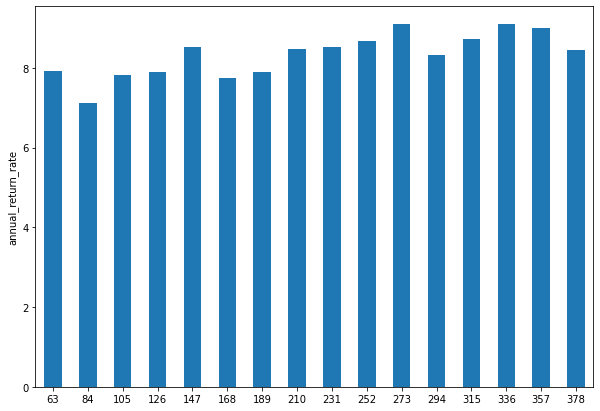

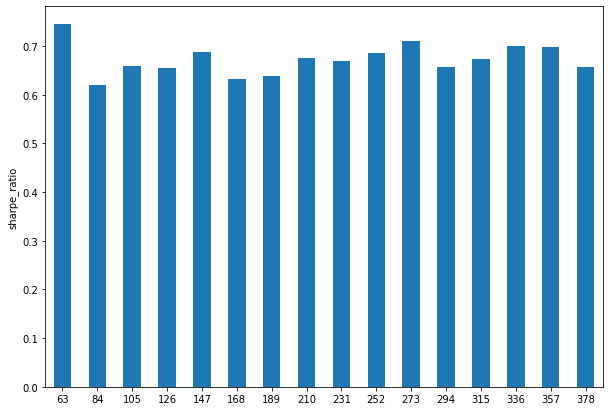

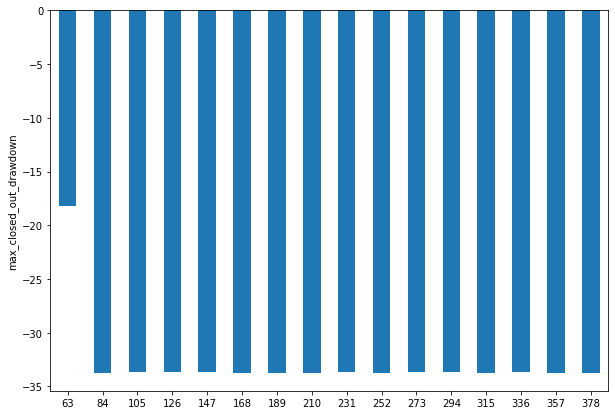

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1995-01-27 00:00:00 BUY  212 SPY @ 47.11
2020-07-14 00:00:00 SELL 212 SPY @ 316.03


Equity curve

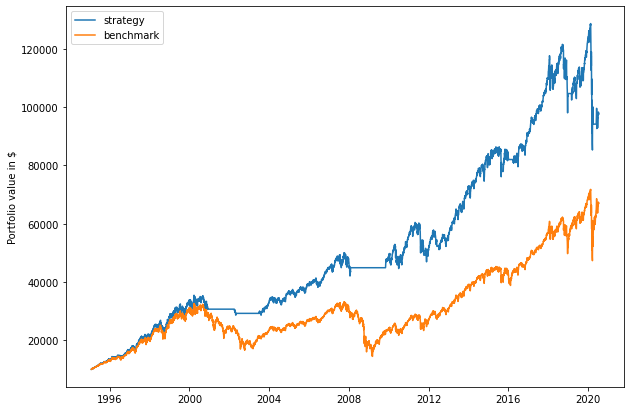

In [9]:
pf.plot_equity_curve(strategies['252'].dbal, benchmark=benchmark.dbal)